<a href="https://colab.research.google.com/github/devikaranidivvela/AI-Enabled-Visa-Status-Prediction-and-Processing-Time-Estimator/blob/main/Visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [167]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d jboysen/us-perm-visas

Dataset URL: https://www.kaggle.com/datasets/jboysen/us-perm-visas
License(s): CC0-1.0
us-perm-visas.zip: Skipping, found more recently modified local copy (use --force to force download)


In [168]:
#extracting a compressed dataset from zip file
from zipfile import ZipFile
dataset = '/content/us-perm-visas.zip'
with ZipFile(dataset,'r') as zip:#r-read
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv('/content/us_perm_visas.csv')
df.head(10)

/tmp/ipython-input-703573396.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/us_perm_visas.csv')


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaN,Denied,EWI,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,Educational Services,47084.0,52000.0,yr,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Advanced Mfg,36733.0,NaN,yr,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,IT,44824.0,85000.0,yr,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Retail,12.86,16.82,hr,NaN,NaN,NaN


In [171]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [172]:
df.shape

(374362, 154)

In [173]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [174]:
df.isnull().sum()

,0
add_these_pw_job_title_9089,332168
agent_city,162908
agent_firm_name,167365
agent_state,166123
application_type,239093
...,...
wage_offer_to_9089,300728
wage_offer_unit_of_pay_9089,115916
wage_offered_from_9089,259715
wage_offered_to_9089,343347


**SELECT IMPORTANT RAW COLUMNS (ORIGINAL DATASET)**

In [175]:
important_cols=['case_number',
                'case_received_date',
                'case_status',
                'class_of_admission',
                'country_of_citizenship',
                'decision_date',
                'job_info_job_title',
                'job_info_education',
                'agent_state',
                'agent_city']

In [176]:
df=df[important_cols]
df


,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,job_info_job_title,job_info_education,agent_state,agent_city
0,NaN,NaN,Certified,J-1,NaN,2012-02-01,NaN,NaN,NaN,NaN
1,NaN,NaN,Denied,B-2,NaN,2011-12-21,NaN,NaN,NaN,NaN
2,NaN,NaN,Certified,H-1B,NaN,2011-12-01,NaN,NaN,NaN,NaN
3,NaN,NaN,Certified,B-2,NaN,2011-12-01,NaN,NaN,NaN,NaN
4,NaN,NaN,Certified,L-1,NaN,2012-01-26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
374357,A-16363-85407,2016-12-29,Withdrawn,NaN,SOUTH KOREA,2016-12-30,Office Assistant,Associate's,CA,Buena Park
374358,A-16271-56745,2016-12-30,Withdrawn,L-1,VIETNAM,2016-12-30,Software Engineer II,Master's,WA,Seattle
374359,A-16354-82345,2016-12-30,Withdrawn,H-1B,INDIA,2016-12-30,Computer Systems Analyst,Master's,IL,Schaumburg
374360,A-16357-84250,2016-12-30,Withdrawn,B-2,SOUTH KOREA,2016-12-30,Accounting Clerk,NaN,CA,LOS ANGELES


**Exploring the different datatypes in various columns**

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   case_number             239093 non-null  object
 1   case_received_date      239091 non-null  object
 2   case_status             374362 non-null  object
 3   class_of_admission      351517 non-null  object
 4   country_of_citizenship  353729 non-null  object
 5   decision_date           374362 non-null  object
 6   job_info_job_title      239049 non-null  object
 7   job_info_education      216313 non-null  object
 8   agent_state             208239 non-null  object
 9   agent_city              211454 non-null  object
dtypes: object(10)
memory usage: 28.6+ MB


**DATA CLEANING & TARGET CREATION**

In [178]:
df.isnull().sum()

,0
case_number,135269
case_received_date,135271
case_status,0
class_of_admission,22845
country_of_citizenship,20633
decision_date,0
job_info_job_title,135313
job_info_education,158049
agent_state,166123
agent_city,162908


In [179]:
df['case_received_date']=pd.to_datetime(df['case_received_date'])

In [180]:
df=df.dropna(subset=['case_received_date'])

In [181]:
df['case_received_date'].isnull().sum()

np.int64(0)

**Computation Of Target Variable(Processing_dates):** No.of days between Decision_date and case_received_date

In [182]:
df['decision_date']=pd.to_datetime(df['decision_date'])
df['processing_days']=(df['decision_date']-df['case_received_date']).dt.days
df['processing_days']

/tmp/ipython-input-2613333106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decision_date']=pd.to_datetime(df['decision_date'])
/tmp/ipython-input-2613333106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processing_days']=(df['decision_date']-df['case_received_date']).dt.days


,processing_days
135269,556
135270,591
135271,323
135272,559
135273,591
...,...
374357,1
374358,0
374359,0
374360,0


**Statistical Summary**

In [183]:
df['processing_days'].describe().T

,processing_days
count,239091.000000
mean,208.082797
std,200.087935
min,0.000000
25%,109.000000
50%,161.000000
75%,205.000000
max,3413.000000


In [184]:
df.isnull().sum()

,0
case_number,0
case_received_date,0
case_status,0
class_of_admission,16068
country_of_citizenship,34
decision_date,0
job_info_job_title,44
job_info_education,22780
agent_state,30854
agent_city,27639


**Making a list of all categorical variables**

In [185]:

cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

case_number
A-14160-76066    3
A-15259-18081    2
A-14164-78073    2
A-15211-03835    2
A-15205-01581    2
                ..
A-14338-31106    1
A-14346-34024    1
A-15015-42826    1
A-15023-44978    1
A-15029-46552    1
Name: count, Length: 238416, dtype: int64
--------------------------------------------------
case_status
Certified            120969
Certified-Expired     95570
Denied                12781
Withdrawn              9771
Name: count, dtype: int64
--------------------------------------------------
class_of_admission
H-1B          174334
L-1            14581
F-1            11176
Not in USA      7420
TN              2969
E-2             2916
B-2             2117
EWI              960
Parolee          884
F-2              714
J-1              670
E-3              601
O-1              543
H-4              439
B-1              379
L-2              369
E-1              347
H-1B1            278
H-2B             270
TPS              148
P-1              135
A1/A2            107
H-2A

**Handle missing categorical values**

In [186]:
df['class_of_admission']=df['class_of_admission'].fillna('Unknown_Class')

/tmp/ipython-input-647492056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class_of_admission']=df['class_of_admission'].fillna('Unknown_Class')


In [187]:
df['country_of_citizenship']=df['country_of_citizenship'].fillna(df['country_of_citizenship'].mode()[0])

/tmp/ipython-input-2440853900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_of_citizenship']=df['country_of_citizenship'].fillna(df['country_of_citizenship'].mode()[0])


In [188]:
df['job_info_job_title']=df['job_info_job_title'].fillna(df['job_info_job_title'].mode()[0])

/tmp/ipython-input-2899645856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_info_job_title']=df['job_info_job_title'].fillna(df['job_info_job_title'].mode()[0])


In [189]:
df['job_info_education']=df['job_info_education'].fillna('Unknown')
df['agent_city']=df['agent_city'].fillna('Unknown_City')
df['agent_state']=df['agent_state'].fillna('Unknown_State')

/tmp/ipython-input-1445464243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_info_education']=df['job_info_education'].fillna('Unknown')
/tmp/ipython-input-1445464243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_city']=df['agent_city'].fillna('Unknown_City')
/tmp/ipython-input-1445464243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [190]:
df.isnull().sum()

,0
case_number,0
case_received_date,0
case_status,0
class_of_admission,0
country_of_citizenship,0
decision_date,0
job_info_job_title,0
job_info_education,0
agent_state,0
agent_city,0


In [191]:
df['job_info_education'].unique()

array(["Bachelor's", 'Unknown', 'Doctorate', "Master's", 'High School',
       "Associate's", 'Other'], dtype=object)

In [192]:
df['job_info_job_title'].unique()

array(['Senior Engineer', 'Catfish Processor',
       'Protein Production Scientist', ...,
       'Computer Systems Analyst, Data Integration',
       'Senior .NET Developer(s)',
       'Assistant Vice President, Divisional Business Information Security Officer'],
      dtype=object)

In [193]:
df['agent_city'].unique()

array(['Milwaukee', 'RALEIGH', 'Littleton', ..., 'East Bruswick',
       'DOWNEY', 'Dalton'], dtype=object)

In [194]:
df['agent_state'].unique()

array(['WISCONSIN', 'NORTH CAROLINA', 'COLORADO', 'CALIFORNIA',
       'MICHIGAN', 'NEW YORK', 'Unknown_State', 'TEXAS', 'PENNSYLVANIA',
       'NEW JERSEY', 'MISSOURI', 'FLORIDA', 'VIRGINIA', 'OHIO',
       'DISTRICT OF COLUMBIA', 'INDIANA', 'GEORGIA', 'MASSACHUSETTS',
       'ILLINOIS', 'ALABAMA', 'OKLAHOMA', 'WASHINGTON', 'CONNECTICUT',
       'MINNESOTA', 'ARKANSAS', 'HAWAII', 'MARYLAND', 'UTAH',
       'PUERTO RICO', 'ARIZONA', 'NEVADA', 'NEW HAMPSHIRE', 'OREGON',
       'KANSAS', 'NEW MEXICO', 'VERMONT', 'TENNESSEE', 'NEBRASKA',
       'LOUISIANA', 'KENTUCKY', 'GUAM', 'IOWA', 'SOUTH CAROLINA',
       'RHODE ISLAND', 'MAINE', 'IDAHO', 'NORTH DAKOTA', 'ALASKA',
       'MISSISSIPPI', 'DELAWARE', 'MARSHALL ISLANDS', 'SOUTH DAKOTA',
       'MONTANA', 'WEST VIRGINIA', 'NE', 'FL', 'TX', 'CA', 'NY', 'GA',
       'MA', 'DC', 'IL', 'VA', 'NC', 'MD', 'TN', 'LA', 'NJ', 'HI', 'PA',
       'MI', 'MO', 'WI', 'OK', 'AZ', 'OR', 'MN', 'OH', 'CT', 'UT', 'SC',
       'AL', 'WA', 'IN', 'NH', 'CO', 'V

In [195]:
df['class_of_admission'].unique()

array(['H-1B', 'Unknown_Class', 'E-2', 'F-1', 'Not in USA', 'L-1',
       'Parolee', 'E-1', 'EWI', 'B-2', 'TN', 'J-1', 'R-1', 'F-2', 'H-1B1',
       'H-2B', 'VWT', 'P-1', 'B-1', 'A1/A2', 'C-1', 'VWB', 'L-2', 'H-4',
       'G-5', 'O-1', 'E-3', 'P-3', 'TPS', 'J-2', 'G-4', 'A-3', 'H-1A',
       'H-2A', 'M-1', 'I', 'H-3', 'Q', 'G-1', 'R-2', 'N', 'D-1', 'TD',
       'C-3', 'P-4', 'O-2', 'K-1', 'O-3', 'V-2', 'T-1', 'M-2', 'P-2'],
      dtype=object)

In [196]:
df['country_of_citizenship'].unique()

array(['INDIA', 'SOUTH KOREA', 'GERMANY', 'CANADA', 'BRAZIL', 'CHINA',
       'BELARUS', 'PAKISTAN', 'GUATEMALA', 'MEXICO', 'TURKEY',
       'ARGENTINA', 'ECUADOR', 'COLOMBIA', 'FRANCE', 'JAPAN', 'UKRAINE',
       'PHILIPPINES', 'GUYANA', 'AUSTRALIA', 'ISRAEL', 'NEPAL', 'RUSSIA',
       'UNITED STATES OF AMERICA', 'PERU', 'SOUTH AFRICA', 'EGYPT',
       'UNITED KINGDOM', 'TANZANIA', 'GRENADA', 'PANAMA', 'UZBEKISTAN',
       'DOMINICA', 'POLAND', 'NEW ZEALAND', 'KENYA', 'HONDURAS',
       'MALAYSIA', 'UGANDA', 'NIGERIA', 'IRELAND', 'BOLIVIA', 'URUGUAY',
       'ITALY', 'ZIMBABWE', 'EL SALVADOR', 'JAMAICA', 'TAIWAN',
       'SLOVAKIA', 'INDONESIA', 'LEBANON', 'SPAIN', 'HUNGARY',
       'TRINIDAD AND TOBAGO', 'DOMINICAN REPUBLIC', 'BULGARIA',
       'HONG KONG', 'YUGOSLAVIA', 'VENEZUELA', 'BURMA (MYANMAR)',
       'ROMANIA', 'ALBANIA', 'TOGO', 'NETHERLANDS', 'CHILE', 'PORTUGAL',
       'ST LUCIA', 'VIETNAM', 'THAILAND', 'MOROCCO', 'IRAN', 'BELIZE',
       'CROATIA', 'BHUTAN', 'SAUDI ARABI

**TRAIN–TEST SPLIT (X / y SEPARATION)**

In [197]:
y = df['processing_days']        # Target
X = df.drop(columns=['processing_days'])  # Features

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (191272, 10) X_test: (47819, 10)


**FEATURE ENGINEERING – JOB FEATURES**

**Applying Encoding Techniques to the columns**

In [198]:
import re
def job_group(title):
    t = str(title).lower()
    if re.search(r'engineer|developer|software|architect|programmer|computer', t):
        return 'Engineering'
    if re.search(r'analyst|data', t):
        return 'Analyst'
    if re.search(r'scientist|research|lab|chemist|bio|pharma', t):
        return 'Science'
    if re.search(r'manager|director|vp|lead|supervisor', t):
        return 'Management'
    if re.search(r'technician|tech', t):
        return 'Technician'
    if re.search(r'nurse|medical|dental|therap', t):
        return 'Healthcare'
    if re.search(r'teacher|professor|instructor', t):
        return 'Education'
    return 'Other'


In [199]:
global_mean = y_train.mean()

In [200]:
# Job category
X_train['job_category'] = X_train['job_info_job_title'].apply(job_group)
X_test['job_category'] = X_test['job_info_job_title'].apply(job_group)

# One-hot encoding
job_dummies_train = pd.get_dummies(X_train['job_category'], prefix='job', dtype=int)
job_dummies_test = pd.get_dummies(X_test['job_category'], prefix='job', dtype=int)

job_dummies_test = job_dummies_test.reindex(
    columns=job_dummies_train.columns, fill_value=0
)

X_train = pd.concat([X_train, job_dummies_train], axis=1)
X_test = pd.concat([X_test, job_dummies_test], axis=1)

# Job title frequency (train-only stats)
job_freq = X_train['job_info_job_title'].value_counts()
X_train['job_title_freq'] = X_train['job_info_job_title'].map(job_freq)
X_test['job_title_freq'] = X_test['job_info_job_title'].map(job_freq).fillna(0)



In [201]:
# Agent state target encoding
state_tgt = y_train.groupby(X_train['agent_state']).mean()
X_train['agent_state_tgt'] = X_train['agent_state'].map(state_tgt)
X_test['agent_state_tgt'] = X_test['agent_state'].map(state_tgt)

X_train['agent_state_tgt'].fillna(global_mean, inplace=True)
X_test['agent_state_tgt'].fillna(global_mean, inplace=True)

/tmp/ipython-input-3996124711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['agent_state_tgt'].fillna(global_mean, inplace=True)
/tmp/ipython-input-3996124711.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [202]:
# Agent state target encoding
city_tgt = y_train.groupby(X_train['agent_city']).mean()
X_train['agent_city_tgt'] = X_train['agent_city'].map(city_tgt)
X_test['agent_city_tgt'] = X_test['agent_city'].map(city_tgt)

X_train['agent_city_tgt'].fillna(global_mean, inplace=True)
X_test['agent_city_tgt'].fillna(global_mean, inplace=True)

/tmp/ipython-input-1239956478.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['agent_city_tgt'].fillna(global_mean, inplace=True)
/tmp/ipython-input-1239956478.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [203]:
# Country target encoding
country_tgt = y_train.groupby(X_train['country_of_citizenship']).mean()
X_train['citizenship_tgt'] = X_train['country_of_citizenship'].map(country_tgt)
X_test['citizenship_tgt'] = X_test['country_of_citizenship'].map(country_tgt)

X_train['citizenship_tgt'].fillna(global_mean, inplace=True)
X_test['citizenship_tgt'].fillna(global_mean, inplace=True)

/tmp/ipython-input-3206266865.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['citizenship_tgt'].fillna(global_mean, inplace=True)
/tmp/ipython-input-3206266865.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [204]:
# Visa class target encoding
visa_tgt = y_train.groupby(X_train['class_of_admission']).mean()
X_train['visa_type'] = X_train['class_of_admission'].map(visa_tgt)
X_test['visa_type'] = X_test['class_of_admission'].map(visa_tgt)

X_train['visa_type'].fillna(global_mean, inplace=True)
X_test['visa_type'].fillna(global_mean, inplace=True)


/tmp/ipython-input-3568507990.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['visa_type'].fillna(global_mean, inplace=True)
/tmp/ipython-input-3568507990.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

FEATURE ENGINEERING – EDUCATION FEATURES

In [205]:
def clean_education_text(x):
    x = str(x).lower()
    x = re.sub(r"'s|’s", "", x)
    x = re.sub(r"[^a-z ]", " ", x)
    return re.sub(r"\s+", " ", x).strip()


def simplify_education(x):
    x = clean_education_text(x)
    if 'doctorate' in x: return 'Doctorate'
    if 'master' in x: return 'Master'
    if 'bachelor' in x: return 'Bachelor'
    if 'associate' in x: return 'Associate'
    if 'high school' in x: return 'High_School'
    if x == '' or 'unknown' in x: return 'Unknown'
    return 'Other'


In [206]:
X_train['edu_simple'] = X_train['job_info_education'].apply(simplify_education)
X_test['edu_simple'] = X_test['job_info_education'].apply(simplify_education)

edu_dummies_train = pd.get_dummies(X_train['edu_simple'], dtype=int)
edu_dummies_test = pd.get_dummies(X_test['edu_simple'], dtype=int)

edu_dummies_test = edu_dummies_test.reindex(
    columns=edu_dummies_train.columns, fill_value=0
)

X_train = pd.concat([X_train, edu_dummies_train], axis=1)
X_test = pd.concat([X_test, edu_dummies_test], axis=1)

In [207]:
drop_cols = [
    'case_number', 'case_received_date', 'decision_date', 'case_status',
    'job_info_job_title', 'job_info_education',
    'agent_city', 'agent_state',
    'country_of_citizenship', 'class_of_admission',
    'job_category', 'edu_simple'
]

In [208]:
X_train.drop(columns=drop_cols, inplace=True)
X_test.drop(columns=drop_cols, inplace=True)

print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)


Final X_train shape: (191272, 20)
Final X_test shape: (47819, 20)


In [209]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191272 entries, 307194 to 257229
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   job_Analyst      191272 non-null  int64  
 1   job_Education    191272 non-null  int64  
 2   job_Engineering  191272 non-null  int64  
 3   job_Healthcare   191272 non-null  int64  
 4   job_Management   191272 non-null  int64  
 5   job_Other        191272 non-null  int64  
 6   job_Science      191272 non-null  int64  
 7   job_Technician   191272 non-null  int64  
 8   job_title_freq   191272 non-null  int64  
 9   agent_state_tgt  191272 non-null  float64
 10  agent_city_tgt   191272 non-null  float64
 11  citizenship_tgt  191272 non-null  float64
 12  visa_type        191272 non-null  float64
 13  Associate        191272 non-null  int64  
 14  Bachelor         191272 non-null  int64  
 15  Doctorate        191272 non-null  int64  
 16  High_School      191272 non-null  int6

**Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of:

* Understanding the structure, quality, and patterns in data

* Identifying trends, relationships, seasonality, and anomalies

* Validating real-world assumptions before modeling

* Guiding feature engineering and model selection

In this project, EDA was used to understand what factors influence visa processing time and why those factors matter




1. Do applicants with higher education levels experience faster and more consistent visa processing times?
2. Does the applicant’s country or continent of origin significantly affect visa processing time?
3. Do different classes of admission have significantly different visa processing timelines?
4. Are standardized and high-skill job roles processed faster than less clearly defined job roles?
5. Does the processing location (agent state) influence visa processing efficiency and consistency?
6. Does the month in which an application is received affect visa processing duration?

**job_info_education Vs processing_days**

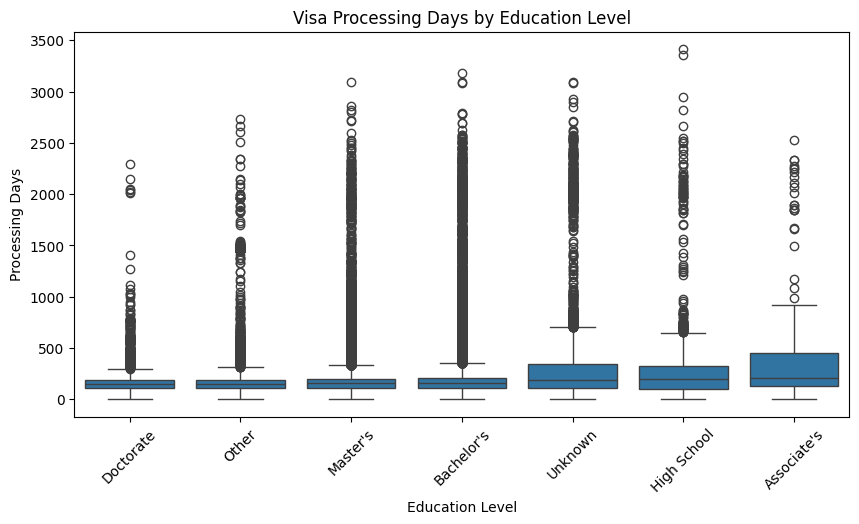

In [210]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='job_info_education',
    y='processing_days',
    data=df,
    order=df.groupby('job_info_education')['processing_days'].mean().sort_values().index
)
plt.title("Visa Processing Days by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Processing Days")
plt.xticks(rotation=45)
plt.show()


From the boxplot, applicants with higher education levels such as Doctorate and Master’s show lower median visa processing days and less variability, while Associate’s, High School, and Unknown education levels exhibit higher median processing times and greater dispersion. This indicates education level plays a significant role in visa processing duration.

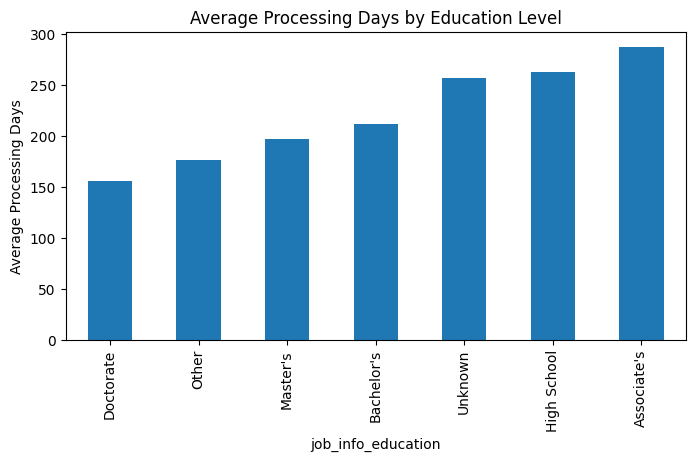

In [211]:
edu_mean = df.groupby('job_info_education')['processing_days'].mean().sort_values()

plt.figure(figsize=(8,4))
edu_mean.plot(kind='bar')
plt.title("Average Processing Days by Education Level")
plt.ylabel("Average Processing Days")
plt.show()


The analysis shows a clear inverse relationship between education level and visa processing time. Applicants with higher education such as Doctorate and Master’s experience faster processing, while those with lower or unknown education levels face longer delays. This suggests education level is an influential factor in visa processing efficiency.

**country_of_citizenship Vs Processing_days**

In [212]:
# Top 10 countries by application count
top_10_countries = (
    df['country_of_citizenship']
    .value_counts()
    .head(10)
    .index
)

df_top10 = df[df['country_of_citizenship'].isin(top_10_countries)]


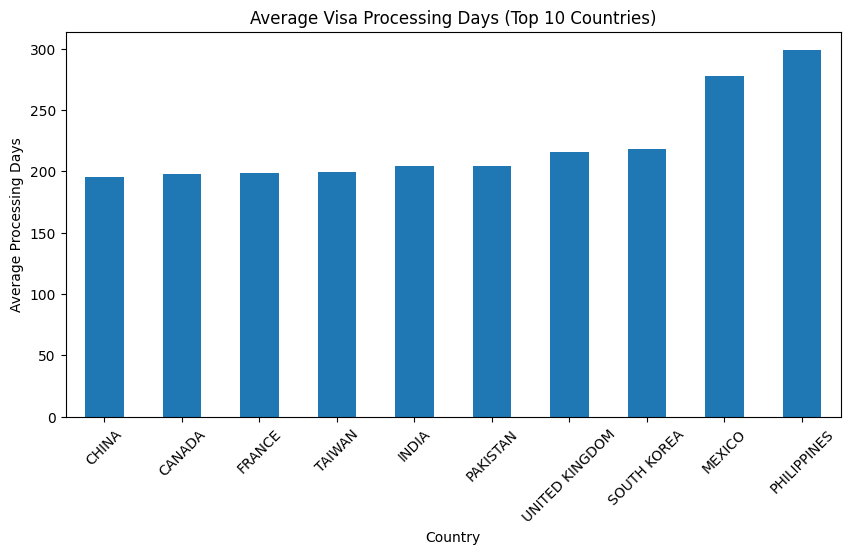

In [213]:
# Average processing days by top 10 countries
country_mean = (
    df_top10
    .groupby('country_of_citizenship')['processing_days']
    .mean()
    .sort_values()
)

plt.figure(figsize=(10,5))
country_mean.plot(kind='bar')
plt.title("Average Visa Processing Days (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Average Processing Days")
plt.xticks(rotation=45)
plt.show()


**class_of_admission Vs processing_days**

/tmp/ipython-input-2728078695.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


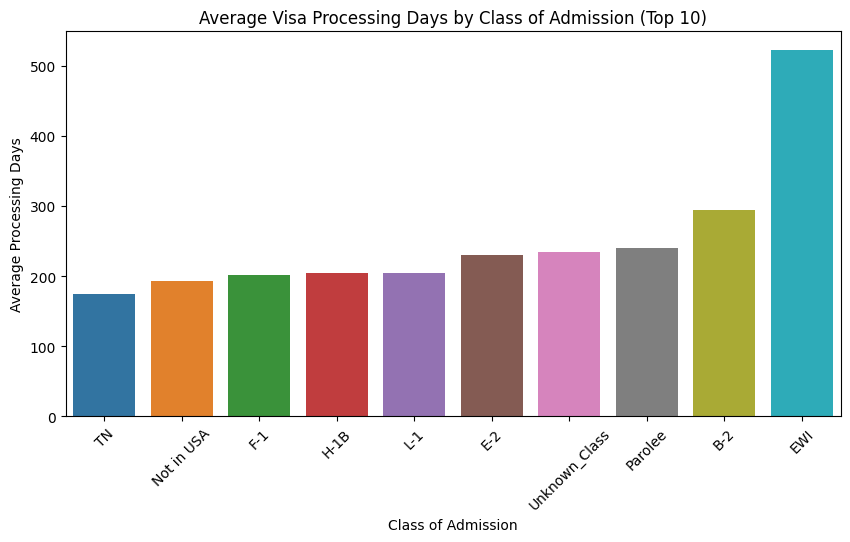

In [214]:
# Select top 10 visa classes by count
top_10_classes = (
    df['class_of_admission']
    .value_counts()
    .head(10)
    .index
)

df_top10_class = df[df['class_of_admission'].isin(top_10_classes)]

class_mean = (
    df_top10_class
    .groupby('class_of_admission')['processing_days']
    .mean()
    .sort_values()
)
class_mean_df = class_mean.reset_index()
class_mean_df.columns = ['class_of_admission', 'avg_processing_days']

plt.figure(figsize=(10,5))
sns.barplot(
    data=class_mean_df,
    x='class_of_admission',
    y='avg_processing_days',
    palette='tab10'
)
plt.title("Average Visa Processing Days by Class of Admission (Top 10)")
plt.xlabel("Class of Admission")
plt.ylabel("Average Processing Days")
plt.xticks(rotation=45)
plt.show()


**Job_category Vs processing_days**

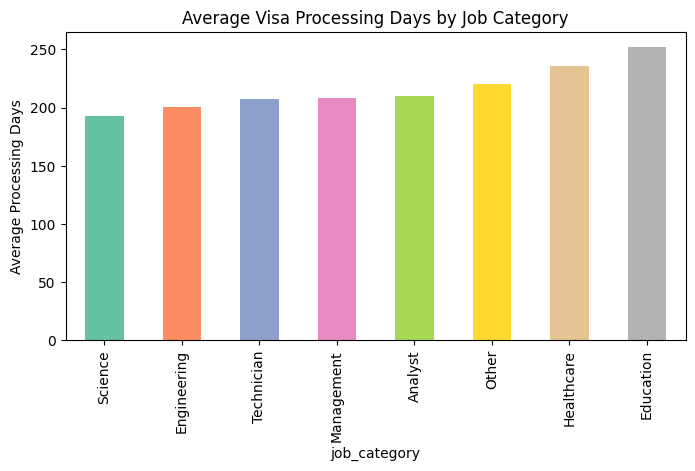

In [218]:
df.loc[:, 'job_category'] = df['job_info_job_title'].apply(job_group)

job_cat_mean = (
    df.groupby('job_category')['processing_days']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,4))
job_cat_mean.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title("Average Visa Processing Days by Job Category")
plt.ylabel("Average Processing Days")
plt.show()

Highly specialized roles such as Science and Engineering are processed faster, whereas Healthcare and Education roles experience longer visa processing times.

**Month Vs processing days**

/tmp/ipython-input-174306827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['received_month_name'] = df['case_received_date'].dt.month_name()


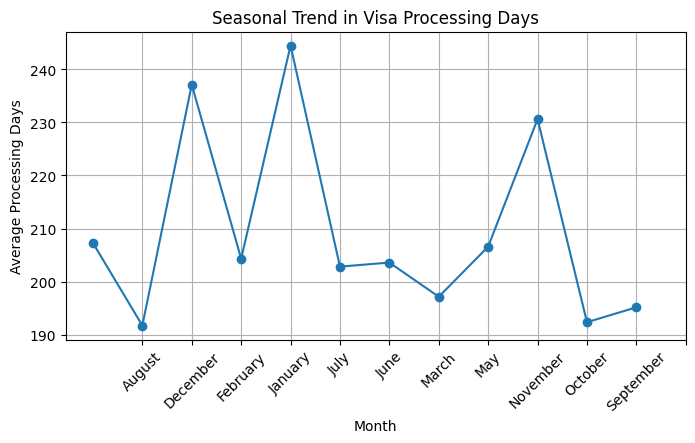

In [219]:
df['received_month_name'] = df['case_received_date'].dt.month_name()

month_trend = (
    df.groupby('received_month_name')['processing_days']
    .mean()
)

plt.figure(figsize=(8,4))
plt.plot(month_trend.index, month_trend.values, marker='o')
plt.title("Seasonal Trend in Visa Processing Days")
plt.xlabel("Month")
plt.ylabel("Average Processing Days")
plt.xticks(range(1,13),rotation=45)
plt.grid(True)
plt.show()


Visa processing days exhibit seasonal variation, with longer delays observed in January and December, moderate processing times during May to July, and faster processing in the August to October period.

**Agent_State Vs Processing days**

In [220]:
top_10_states = (
    df['agent_state']
    .value_counts()
    .head(10)
    .index
)

df_top10_state = df[df['agent_state'].isin(top_10_states)]

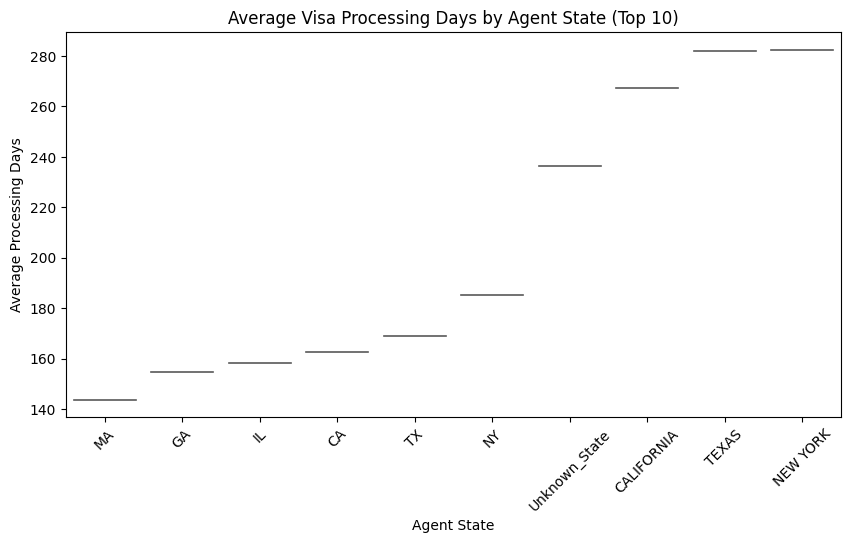

In [221]:
state_mean = (
    df_top10_state
    .groupby('agent_state')['processing_days']
    .mean()
    .sort_values()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.violinplot(
    data=state_mean,
    x='agent_state',
    y='processing_days',
     hue='agent_state',
    inner='quartile',
    palette='Set2',
    linewidth=1.2

)
plt.title("Average Visa Processing Days by Agent State (Top 10)")
plt.xlabel("Agent State")
plt.ylabel("Average Processing Days")
plt.xticks(rotation=45)
plt.show()
